In [1]:
import numpy as np
import csv as csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV ,StratifiedKFold

import numpy as np
import pylab as plt
from glob import glob
import argparse
import os
import progressbar
import pickle as pkl
from numpy.lib import stride_tricks
from skimage import feature
from sklearn import metrics
from sklearn.model_selection import train_test_split
import time
import mahotas as mt

import tensorflow as tf
from datetime import datetime
from IPython import display
from tensorflow.keras.utils import Sequence
from keras import backend as K
import random
import cv2

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
class DataGenerator(Sequence):
    def __init__(self, list_IDs,label_map , img_dir ,mode):
        'Initialization'
        self.list_IDs = list_IDs
        self.label_map = image_label_map
        self.on_epoch_end()
        self.img_dir = img_dir + "/images"
        self.mask_dir = img_dir + "/masks"
        self.mode = mode

    def __len__(self):
        return int(len(self.list_IDs))

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
    
    def __getitem__(self, index):
        'Generate one batch of data'
        indexes = self.indexes[index:(index+1)]
        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        # Generate data
        X, y = self.__data_generation(list_IDs_temp)
        return X, y    
    
    def __data_generation(self, list_IDs_temp):
        """Generates data containing batch_size samples"""
        if self.mode == "train":
            # Generate data
            X, y = self.load_file(list_IDs_temp)
            return X, y
        elif self.mode == "val":
            X, y = self.load_file(list_IDs_temp)
            return X, y        
        
    def load_file(self, id_list):
        list_IDs_temp = id_list
        for ID in list_IDs_temp:
            x_file_path = os.path.join(self.img_dir, ID)
            y_file_path = os.path.join(self.mask_dir, self.label_map.get(ID))
            # Store sample
            X = np.load(x_file_path)
            # Store class
            y = np.load(y_file_path).astype('float32')
        return X, y    

train_generator = DataGenerator(partition,image_label_map,out_train_data_dir, "train")
val_generator= DataGenerator(val_partition,val_image_label_map,out_val_data_dir, "val")

print( len(train_masks) , len(train_imgs) )

print(train_imgs[:3]

#re ,inp = load(PATH+'train/100.jpg')
#flips mask and input image
re_inp = DataGenerator(partition
                       ,image_label_map
                       ,out_train_data_dir
                       , "train")
val_re_inp= DataGenerator(val_partition
                          ,val_image_label_map
                          ,out_val_data_dir
                          , "val")

In [3]:
def read_data(img_npy ,image_dir ,label_npy ,label_dir):
    print ('[INFO] Reading image data.')
    image_list = []
    label_list = []
    
    '''for file in img_npy:        
        for batch in range( bs1 ):        
            for row in range( train_ds[batch][0][...].shape[0] ):
                print('.' , row , end='')
        
                x = os.path.join( image_dir ,file )
                x = np.load( x )
                image_list.append( x )'''
                          
    for file in img_npy:
        x1 = os.path.join( image_dir ,file )
        #print(x1)
        x2 = np.load( x1 )        
        x2 = np.int64(x2*255)
        bs1 = len(x2)
        
        for batch in range( bs1 ):        
            #for row in range( x2[batch][...].shape[0] ): 
            x3 = x2[batch]            
            image_list.append( x3 )                
            if (batch == 1) & (file == "image_file_24.npy"):
                print("trainshape: " ,x3.shape)  
                
    for file in label_npy:
        x1 = os.path.join( label_dir ,file )
        #print(x1)
        x2 = np.load( x1 )    
        x2 = np.int64(x2*255)
        bs1 = len(x2)
        
        for batch in range( bs1 ):        
            #for row in range( x2[batch][...].shape[0] ):  
            x3 = x2[batch]         
            label_list.append( x3 )
            if (batch == 1) & (file == "label_file_24.npy"):
                print("trainshape: " ,x3.shape)   
                
    
    '''for file in img_npy:
        x1 = os.path.join( image_dir ,file )
        x2 = np.load( x1 )
        image_list.append( x2 )
        
    for file in label_npy:
        x1 = os.path.join( image_dir ,file )
        x2 = np.load( x1 )
        label_list.append( x2 )'''

    return image_list, label_list

out_train_data_dir = '/home/hgamarro/DeepLearning/HG_space/data/processed/Vegas/train'
out_val_data_dir = '/home/hgamarro/DeepLearning/HG_space/data/processed/Vegas/val'

# ====================
# train set
# ====================
train_imgs = [s for s in os.listdir(out_train_data_dir + "/images/") if s.endswith('.npy')]
train_masks = [s for s in os.listdir(out_train_data_dir + "/masks/") if s.endswith('.npy')]

# ====================
# validation set
# ====================
val_imgs = [s for s in os.listdir(out_val_data_dir + "/images/") if s.endswith('.npy')]
val_masks = [s for s in os.listdir(out_val_data_dir + "/masks/") if s.endswith('.npy')]

image_list , label_list = read_data( train_imgs
                                , out_train_data_dir + "/images/"
                                , train_masks
                                , out_train_data_dir + "/masks/"
                               )

In [5]:
x = image_list[0]

In [6]:
x.shape

(512, 512, 3)

In [7]:
type(x)

numpy.ndarray

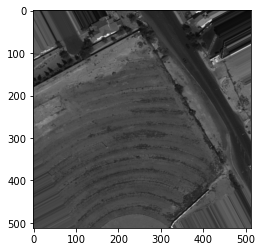

In [8]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(x)  
plt.imshow(gray, cmap=plt.get_cmap('gray'))

In [70]:
cv2.imread(x)

TypeError: Can't convert object of type 'numpy.ndarray' to 'str' for 'filename'

In [72]:
cv2.cvtColor(x , cv2.COLOR_RGB2GRAY )

error: OpenCV(4.5.1) /tmp/pip-req-build-2mj8ejrk/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


In [68]:
cv2.cvtColor(x,  cv2.COLOR_BGR2RGB)

error: OpenCV(4.5.1) /tmp/pip-req-build-2mj8ejrk/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


In [ ]:
image_list[0][0]*255

os.path.join(out_train_data_dir + "/images/" ,"image_file_87.npy" )

os.path.isfile( os.path.join(out_train_data_dir + "/images/" ,"image_file_87.npy" ))

np.load(os.path.join( out_train_data_dir + "/images/" ,train_imgs[0] ) )

len(train_imgs)

image_list[0].shape

In [4]:
def subsample(features, labels, low, high, sample_size):

    idx = np.random.randint(low, high, sample_size)

    return features[idx], labels[idx]

def subsample_idx(low, high, sample_size):

    return np.random.randint(low,high,sample_size)

In [5]:
def calc_haralick(roi):

    feature_vec = []

    texture_features = mt.features.haralick(roi)
    mean_ht = texture_features.mean(axis=0)

    [feature_vec.append(i) for i in mean_ht[0:9]]

    return np.array(feature_vec)

In [6]:
def harlick_features(img, h_neigh, ss_idx):

    print ('[INFO] Computing haralick features.')
    size = h_neigh
    shape = (img.shape[0] - size + 1, img.shape[1] - size + 1, size, size)
    strides = 2 * img.strides
    patches = stride_tricks.as_strided(img, shape=shape, strides=strides)
    patches = patches.reshape(-1, size, size)

    if len(ss_idx) == 0 :
        bar = progressbar.ProgressBar(maxval=len(patches), \
        widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    else:
        bar = progressbar.ProgressBar(maxval=len(ss_idx), \
        widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

    bar.start()

    h_features = []

    if len(ss_idx) == 0:
        for i, p in enumerate(patches):
            bar.update(i+1)
            h_features.append(calc_haralick(p))
    else:
        for i, p in enumerate(patches[ss_idx]):
            bar.update(i+1)
            h_features.append(calc_haralick(p))

    #h_features = [calc_haralick(p) for p in patches[ss_idx]]

    return np.array(h_features)

In [7]:
def create_binary_pattern(img, p, r):

    print ('[INFO] Computing local binary pattern features.')
    lbp = feature.local_binary_pattern(img, p, r)
    return (lbp-np.min(lbp))/(np.max(lbp)-np.min(lbp)) * 255

In [8]:
def create_features(img, img_gray, label, train=True):

    lbp_radius = 24 # local binary pattern neighbourhood
    h_neigh = 11 # haralick neighbourhood
    num_examples = 1000 # number of examples per image to use for training model

    lbp_points = lbp_radius*8
    h_ind = int((h_neigh - 1)/ 2)

    feature_img = np.zeros((img.shape[0],img.shape[1],4))
    feature_img[:,:,:3] = img
    img = None
    feature_img[:,:,3] = create_binary_pattern(img_gray, lbp_points, lbp_radius)
    feature_img = feature_img[h_ind:-h_ind, h_ind:-h_ind]
    features = feature_img.reshape(feature_img.shape[0]*feature_img.shape[1], feature_img.shape[2])

    if train == True:
        ss_idx = subsample_idx(0, features.shape[0], num_examples)
        features = features[ss_idx]
    else:
        ss_idx = []

    h_features = harlick_features(img_gray, h_neigh, ss_idx)
    features = np.hstack((features, h_features))

    if train == True:

        label = label[h_ind:-h_ind, h_ind:-h_ind]
        labels = label.reshape(label.shape[0]*label.shape[1], 1)
        labels = labels[ss_idx]
    else:
        labels = None

    return features, labels

In [9]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [10]:
def create_training_dataset(image_list, label_list):

    print ('[INFO] Creating training dataset on %d image(s).' %len(image_list))

    X = []
    y = []

    x = len(image_list)
    for i in range(x):
        #print(img.shape)
        #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_gray = np.int64( rgb2gray(image_list[i])  )
        features, labels = create_features(img, img_gray, label_list[i])
        X.append(features)
        y.append(labels)

    X = np.array(X)
    X = X.reshape(X.shape[0]*X.shape[1], X.shape[2])
    y = np.array(y)
    y = y.reshape(y.shape[0]*y.shape[1], y.shape[2]).ravel()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print ('[INFO] Feature vector size:', X_train.shape)

    return X_train, X_test, y_train, y_test

In [11]:
def train_model(X, y, classifier):

    if classifier == "SVM":
        from sklearn.svm import SVC
        print ('[INFO] Training Support Vector Machine model.')
        model = SVC()
        model.fit(X, y)
    elif classifier == "RF":
        from sklearn.ensemble import RandomForestClassifier
        print ('[INFO] Training Random Forest model.')
        model = RandomForestClassifier(n_estimators=250, max_depth=12, random_state=42)
        model.fit(X, y)
    elif classifier == "GBC":
        from sklearn.ensemble import GradientBoostingClassifier
        model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
        model.fit(X, y)

    print ('[INFO] Model training complete.')
    print ('[INFO] Training Accuracy: %.2f' %model.score(X, y))
    return model

In [12]:
def test_model(X, y, model):

    pred = model.predict(X)
    precision = metrics.precision_score(y, pred, average='weighted', labels=np.unique(pred))
    recall = metrics.recall_score(y, pred, average='weighted', labels=np.unique(pred))
    f1 = metrics.f1_score(y, pred, average='weighted', labels=np.unique(pred))
    accuracy = metrics.accuracy_score(y, pred)

    print ('--------------------------------')
    print ('[RESULTS] Accuracy: %.2f' %accuracy)
    print ('[RESULTS] Precision: %.2f' %precision)
    print ('[RESULTS] Recall: %.2f' %recall)
    print ('[RESULTS] F1: %.2f' %f1)
    print ('--------------------------------')

In [13]:
def main(image_dir, label_dir, classifier, output_model):

    start = time.time()
    
    out_train_data_dir = '/home/hgamarro/DeepLearning/HG_space/data/processed/Vegas/train'
    out_val_data_dir = '/home/hgamarro/DeepLearning/HG_space/data/processed/Vegas/val'

    # ====================
    # train set
    # ====================
    train_imgs = [s for s in os.listdir(out_train_data_dir + "/images/") if s.endswith('.npy')]
    train_masks = [s for s in os.listdir(out_train_data_dir + "/masks/") if s.endswith('.npy')]

    # ====================
    # validation set
    # ====================
    val_imgs = [s for s in os.listdir(out_val_data_dir + "/images/") if s.endswith('.npy')]
    val_masks = [s for s in os.listdir(out_val_data_dir + "/masks/") if s.endswith('.npy')]

    image_list , label_list = read_data( train_imgs
                                    , out_train_data_dir + "/images/"
                                    , train_masks
                                    , out_train_data_dir + "/masks/"
                                   )
    
    val_image_list , val_label_list = read_data( val_imgs
                                            , out_val_data_dir + "/images/"
                                            , val_masks
                                            , out_val_data_dir + "/masks/"
                                           )
    #images = []
    #labels = []
    for i in range(0, len(val_image_list)): 
        image_list.append(val_image_list)
        label_list.append(val_label_list)
    
    X_train, X_test, y_train, y_test = create_training_dataset(image_list, label_list)
    
    #y_train, y_test = create_training_dataset(image_list, label_list)
    
    test_model(X_test, y_test, model)
    pkl.dump(model, open(output_model, "wb"))
    print ('Processing time:',time.time()-start)

In [14]:
out_train_data_dir = '/home/hgamarro/DeepLearning/HG_space/data/processed/Vegas/train'
out_val_data_dir = '/home/hgamarro/DeepLearning/HG_space/data/processed/Vegas/val'

# ====================
# train set
# ====================
train_imgs = [s for s in os.listdir(out_train_data_dir + "/images/") if s.endswith('.npy')]
train_masks = [s for s in os.listdir(out_train_data_dir + "/masks/") if s.endswith('.npy')]

# ====================
# validation set
# ====================
val_imgs = [s for s in os.listdir(out_val_data_dir + "/images/") if s.endswith('.npy')]
val_masks = [s for s in os.listdir(out_val_data_dir + "/masks/") if s.endswith('.npy')]

image_list , label_list = read_data( train_imgs
                                , out_train_data_dir + "/images/"
                                , train_masks
                                , out_train_data_dir + "/masks/"
                               )

val_image_list , val_label_list = read_data( val_imgs
                                        , out_val_data_dir + "/images/"
                                        , val_masks
                                        , out_val_data_dir + "/masks/"
                                       )

for i in range(0, len(val_image_list)): 
    images = image_list.append(val_image_list)
    labels = label_list.append(val_label_list)

[INFO] Reading image data.
trainshape:  (512, 512, 3)
trainshape:  (512, 512, 1)
[INFO] Reading image data.


NameError: name 'list_to_iterate' is not defined

In [15]:
len(image_list)

2891

In [16]:
image_list[0].shape

(512, 512, 3)

In [27]:
x = len(image_list)
for i in range(x):
    #print(img.shape)
    #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = np.int64( rgb2gray(image_list[i])  )
    #features, labels = create_features(img, img_gray, label_list[i])

In [28]:
len(img_gray)

512

In [43]:

for i in range(3):
    img_gray = np.int64( rgb2gray( image_list[0] ) )#.shape
    print(img_gray.shape)

(512, 512)
(512, 512)
(512, 512)


In [ ]:
image_list.shape

In [ ]:
if __name__ == "__main__":
    #args = parse_args()
    image_dir =  None #args.image_dir
    label_dir = None #args.label_dir
    classifier = "RF" #args.classifier
    output_model = "/home/hgamarro/DeepLearning/JB_space/models/randomforest/randomforest1.pkl"
    main(image_dir, label_dir, classifier, output_model)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=250, max_depth=12, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, 
                                    method = "predict_proba")

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

In [ ]:
y_scores_forest = y_probas_forest[:,1] # score = probab of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [ ]:
plt.plot(fpr, tpr, "b:", label="RF")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_prob_predict = (y_scores_forest > .5)

In [ ]:
precision_score(y_train_5, y_prob_predict)

In [ ]:
recall_score(y_train_5, y_prob_predict)

In [ ]:
y_probas_forest_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [ ]:
precision_score(y_train_5, y_probas_forest_pred)

In [ ]:
recall_score(y_train_5, y_probas_forest_pred)

In [ ]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

In [15]:
x=np.zeros((5,5,4))

In [14]:
x.reshape(-1)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [16]:
np.random.randint(0,3,5)

array([2, 2, 1, 2, 1])

In [ ]:

# Optimization
parameter_gridsearch = {
                 'max_depth' : [3, 4],  #depth of each decision tree
                 'n_estimators': [50, 20],  #count of decision tree
                 'max_features': ['sqrt', 'auto', 'log2'],      
                 'min_samples_split': [2],      
                 'min_samples_leaf': [1, 3, 4],
                 'bootstrap': [True, False],
                 }
# RF classification

randomforest = randomForestClassifier()
crossvalidation = StratifiedKFold(train[0::,0] , n_folds=5)

gridsearch = GridSearchCV(randomforest,             #grid search for algorithm optimization
                               scoring='accuracy',
                               param_grid=parameter_gridsearch,
                               cv=crossvalidation)


#gridsearch.fit(train[0::,1::], train[0::,0])    #train[0::,0] is as target
gridsearch.fit(train[0::,1::], train[0::,0])    #train[0::,0] is as target
model = gridsearch
parameters = gridsearch.best_params_